1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

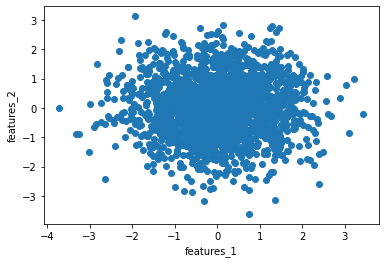

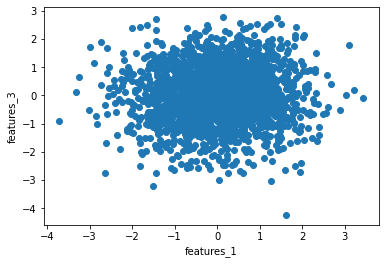

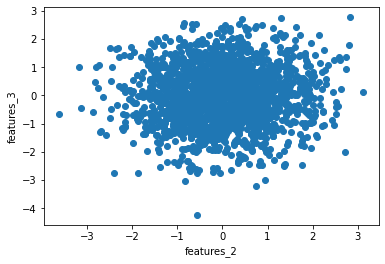

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm
import scipy
dataframe = pd.read_csv('https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv?dl=1')

plt.scatter(dataframe['features_1'], dataframe['features_2'])
plt.xlabel('features_1')
plt.ylabel('features_2')
plt.show()
plt.scatter(dataframe['features_1'], dataframe['features_3'])
plt.xlabel('features_1')
plt.ylabel('features_3')
plt.show()
plt.scatter(dataframe['features_2'], dataframe['features_3'])
plt.xlabel('features_2')
plt.ylabel('features_3')
plt.show()
#the features scatter plots indicate low correlation values

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

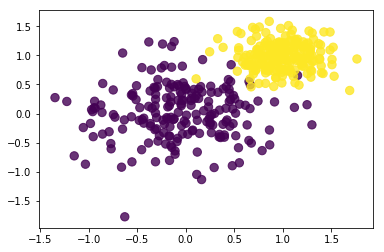

In [2]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

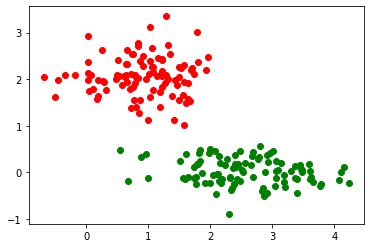

In [3]:
def dataset2D(loc1, scale1, loc2, scale2):
    feat1 = np.random.normal(loc=loc1, scale=scale1, size=(100,))
    feat2 = np.random.normal(loc=loc2, scale=scale2, size=(100,))
    
    data = np.column_stack((feat1, feat2))
    df = pd.DataFrame(data, columns = ['feat1','feat2'])
    return df
df1 = dataset2D(1, 0.6, 2, 0.4)
df2 = dataset2D(2.5, 0.8, 0, 0.3)
plt.scatter(df1['feat1'], df1['feat2'], color='red')
plt.scatter(df2['feat1'], df2['feat2'], color='green')
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

Dataset: 
 {'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}
Dataframe with absolute values of 'residual' smaller than 2:
        residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns] 



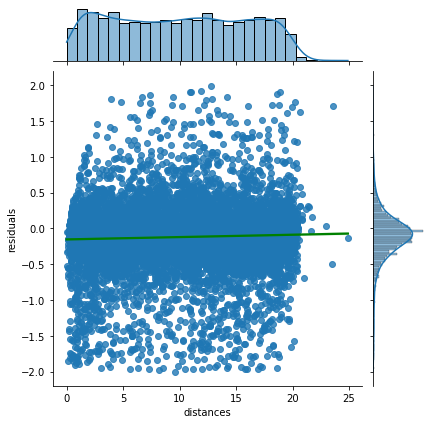

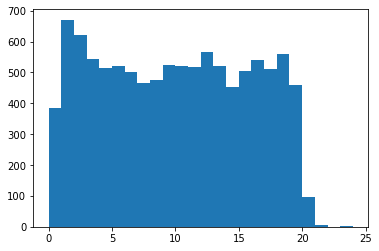


Array of bin centers of the profile histogram of the distance variable:
 [ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5]

Array of mean values of the residuals:
 [-0.24725253 -0.13466177 -0.17574601 -0.16524753 -0.12789461 -0.13872711
 -0.1044014  -0.07896219 -0.10254436 -0.0908137  -0.03936474 -0.09986082
 -0.08483813 -0.13585659 -0.13911416 -0.13586924 -0.1405092  -0.15795732
 -0.12680518 -0.05412943  0.04536905  0.05111111         nan  0.41285714]

Array of standard deviation of the residuals:
 [0.48513191 0.42772044 0.42470284 0.40926986 0.3898872  0.39275946
 0.44553636 0.45383732 0.44323862 0.40470026 0.43840711 0.48095092
 0.50371307 0.45639968 0.45166252 0.46070119 0.43104511 0.42597126
 0.40908127 0.38012036 0.46887913 0.35591128        nan 0.94226027]


(array([1., 0., 1., 2., 8., 4., 2., 2., 0., 0., 0., 2., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-0.24725253, -0.22084814, -0.19444376, -0.16803937, -0.14163498,
        -0.11523059, -0.08882621, -0.06242182, -0.03601743, -0.00961305,
         0.01679134,  0.04319573,  0.06960011,  0.0960045 ,  0.12240889,
         0.14881327,  0.17521766,  0.20162205,  0.22802643,  0.25443082,
         0.28083521,  0.3072396 ,  0.33364398,  0.36004837,  0.38645276,
         0.41285714]),
 <BarContainer object of 25 artists>)

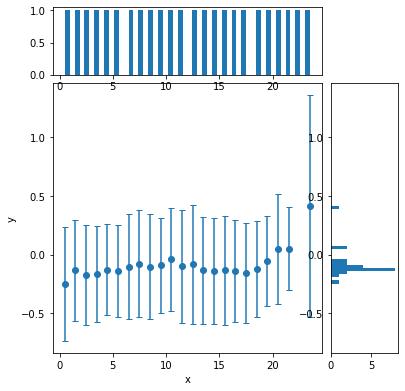

In [45]:
content = pd.read_pickle("data/residuals_261.pkl")
print("Dataset: \n", content)
mydict = dict(enumerate(content.flatten()))

df = pd.DataFrame(mydict[0]['residuals'], columns = ['residuals'])
df = df.assign(distances=mydict[0]['distances'])
dfClean = df[abs(df['residuals']) < 2]
print("Dataframe with absolute values of 'residual' smaller than 2:\n", dfClean, "\n")

sns.jointplot(x="distances", y="residuals", data=dfClean, kind="reg", line_kws={"color":"green"})
plt.show()

#After inspecting the scatter plot it is clear that the 2 variables (distance and residual) have low correlation

b = np.arange(dfClean['distances'].min(), dfClean['distances'].max())
h, bin_edges, _ = plt.hist(dfClean['distances'], bins = b)

x = (bin_edges[:-1] + bin_edges[1:])/2.

plt.show()
print("\nArray of bin centers of the profile histogram of the distance variable:\n", x)

ylist = []
err_yList = []
for dlow, dhigh in zip(bin_edges[:-1], bin_edges[1:]):
    indeces = (dfClean['distances'] >= dlow) & (dfClean['distances'] < dhigh)
    residualmean = dfClean['residuals'][indeces].mean()
    ylist.append(residualmean)
    residualstd = np.std(dfClean['residuals'][indeces])
    err_yList.append(residualstd)

y = np.array(ylist)
err_y = np.array(err_yList)
print("\nArray of mean values of the residuals:\n", y)
print("\nArray of standard deviation of the residuals:\n", err_y)

# Create figure
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Plot profile histograms for x and y and the scatter plot
ax.errorbar(x=x, y=y, yerr=err_y, fmt='o', capsize=3)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax_histx.hist(x, bins=50)
ax_histy.hist(y, bins=25, orientation='horizontal')

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


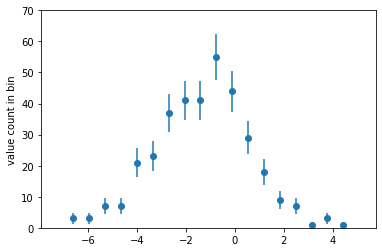

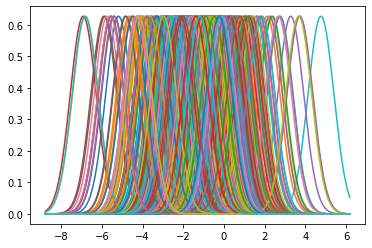

350.00000000000006


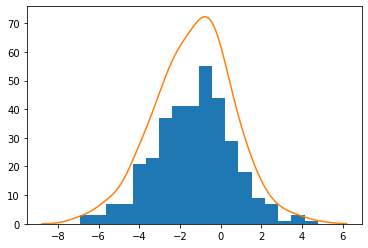

In [25]:
xmean = -1.3
xstd = 1.87
Nsamples=350

x = np.random.normal(loc=xmean, scale=xstd, size=(Nsamples,))
xmin = x.min()
xmax = x.max()
axismin = math.floor(xmin)
axismax = math.ceil(xmax)

b = int(math.sqrt(Nsamples))
counts, bin_edges = np.histogram(x, bins = b)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.ylabel('value count in bin')
plt.xlim([xmin-1, xmax+1])
yval = counts + counts**0.5
ymax = int(yval.max() / 10) * 10 + 10
plt.ylim([0, ymax])
plt.errorbar(bin_centers, counts, yerr=counts**0.5, fmt='o')
plt.show()

xvalues = np.linspace(xmean-4*xstd, xmean+4*xstd, 1000)
sumgauss =  np.zeros(xvalues.shape)
gaussscale = 1.06 * np.std(x) * (x.shape[0]**(-1/5))
newgass=np.zeros([Nsamples,xvalues.shape[0]])

for i in range(Nsamples):
    newgass[i] = norm.pdf(xvalues, loc=x[i], scale=gaussscale)
    plt.plot(xvalues, newgass[i])
    
plt.show()

sumgauss = np.sum(newgass, axis=0)
integral = scipy.integrate.trapz(sumgauss, x = xvalues)
sumgauss = sumgauss * (Nsamples / integral)
print(scipy.integrate.trapz(sumgauss, x = xvalues))

plt.hist(x, bins = b)
plt.plot(xvalues, sumgauss)
plt.show()